<a href="https://colab.research.google.com/github/Nightmare125/Plant-Disease-Prediction/blob/main/Plant_Disease_Prediction_for_Tomatoes_and_Potatoes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

Mount Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Load the Dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/Plant Disease Prediction for Tomatoes and Potatoes Dataset'

Parameters

In [ ]:
img_height, img_width = 150, 150
batch_size = 32


Data augmentation and normalization for training and validation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% of data for validation

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    subset='validation')  # Set as validation data

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


BUILDING OF THE CNN MODEL

In [ ]:
num_classes = len(train_generator.class_indices)  # Number of classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Training of the Model

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/10
15/15 [==============================] - 206s 14s/step - loss: 0.9188 - accuracy: 0.5146 - val_loss: 0.6554 - val_accuracy: 0.8854
Epoch 2/10
15/15 [==============================] - 30s 2s/step - loss: 0.5431 - accuracy: 0.6896 - val_loss: 0.3095 - val_accuracy: 0.9583
Epoch 3/10
15/15 [==============================] - 30s 2s/step - loss: 0.2076 - accuracy: 0.9312 - val_loss: 0.1182 - val_accuracy: 0.9583
Epoch 4/10
15/15 [==============================] - 30s 2s/step - loss: 0.1217 - accuracy: 0.9667 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 29s 2s/step - loss: 0.0707 - accuracy: 0.9854 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 29s 2s/step - loss: 0.0811 - accuracy: 0.9792 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 28s 2s/step - loss: 0.0751 - accuracy: 0.9792 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 8/10
15/15 [

Evaluate and Save the Model

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Save the model
model.save('/content/drive/My Drive/Plant_Disease_Model.h5')

4/4 [==============================] - 4s 809ms/step - loss: 0.0064 - accuracy: 1.0000
Validation Loss: 0.006379858590662479
Validation Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualization  

training & validation accuracy values

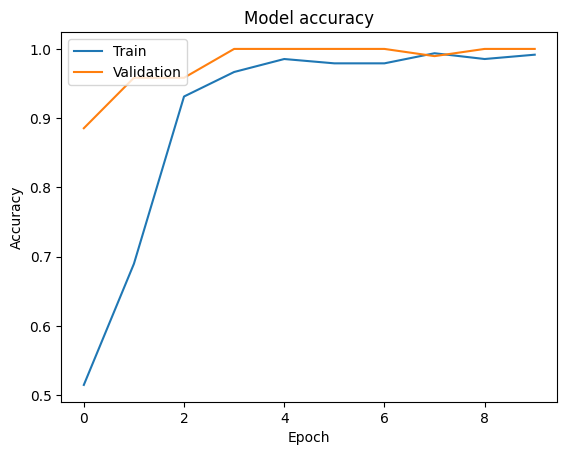

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


training & validation loss values

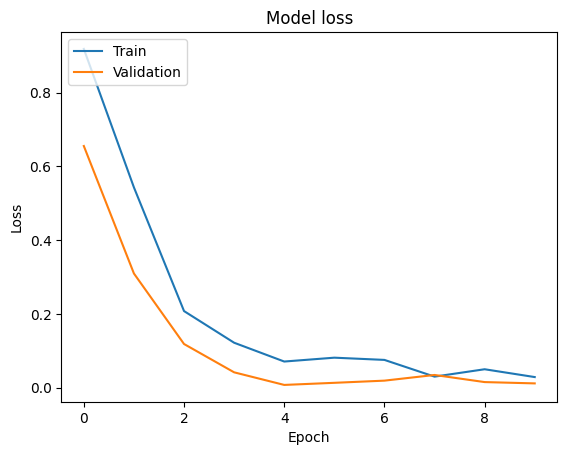

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Predictions

Load an image to test

In [ ]:
img_path = '/content/drive/MyDrive/tomato.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

Predict

In [ ]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted label: {predicted_label}')

1/1 [==============================] - 0s 43ms/step
Predicted label: Tomato___Bacterial_spot


Export the Trained Model

Load the model

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Plant_Disease_Model.h5')

Convert the model to TensorFlow Lite format so as to enable implementation in android

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Save the TensorFlow Lite model

In [ ]:
with open('/content/drive/My Drive/plant_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)